References: https://docs.pymc.io/notebooks/dp_mix.html

In [9]:
import arviz as az
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from matplotlib import pyplot as plt

In [10]:
%config InlineBackend.figure_format = 'retina'
blue, *_ = sns.color_palette()
az.style.use("arviz-darkgrid")
SEED = 5132290  # from random.org
np.random.seed(SEED)

In [11]:
N = 5
K = 30

alpha = 2
P0 = sp.stats.norm
f = lambda x, theta: sp.stats.norm.pdf(x, theta, 0.3)

In [12]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

theta = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 200)

dpm_pdf_components = f(x_plot[np.newaxis, np.newaxis, :], theta[..., np.newaxis])
dpm_pdfs = (w[..., np.newaxis] * dpm_pdf_components).sum(axis=1)

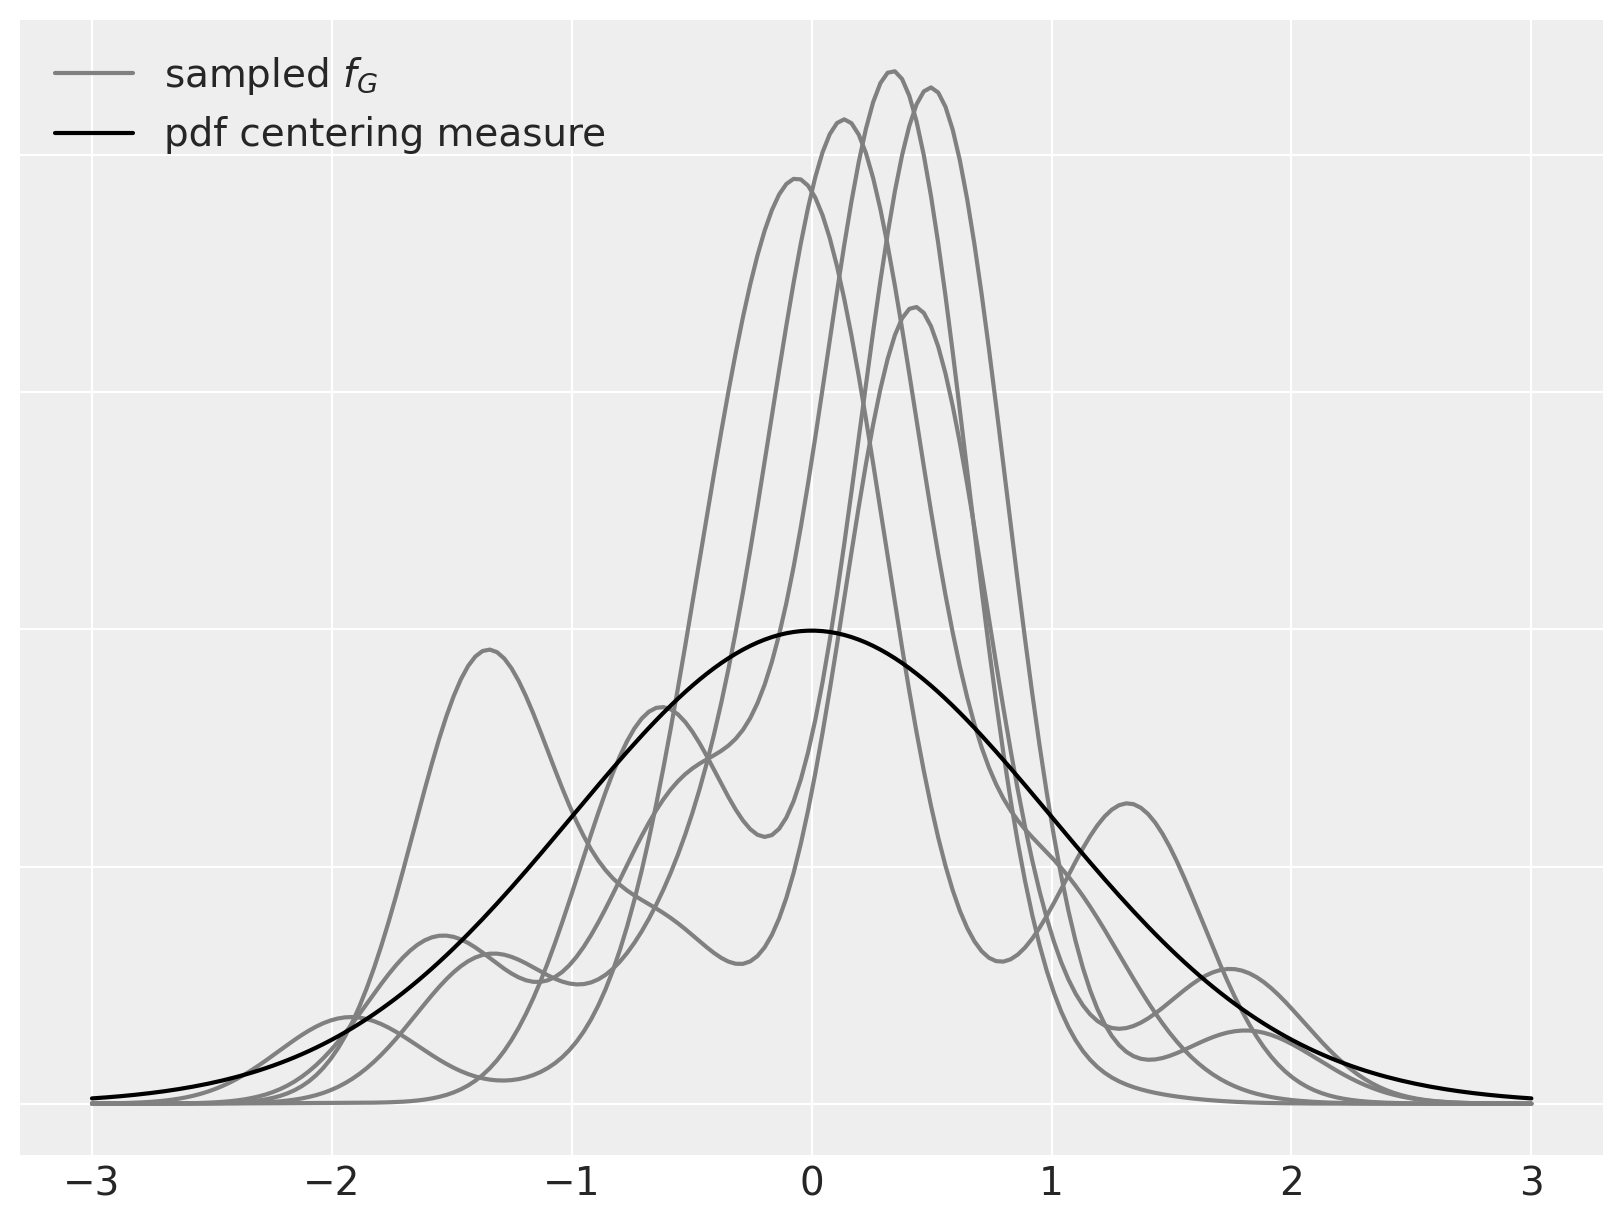

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, dpm_pdfs[0].T, c="gray", label=f"sampled $f_G$")
ax.plot(x_plot, dpm_pdfs[1:].T, c="gray")
ax.plot(x_plot, P0.pdf(x_plot), c="k", label="pdf centering measure")

ax.set_yticklabels([]);
ax.legend(loc=2);